In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Limpieza de datos 

In [2]:
df = pd.read_csv('sampled_data_25k.csv')

df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,hour
0,2019-11-01 16:29:07+00:00,view,2500962,2053013564003713919,appliances.kitchen.oven,electrolux,463.20,516216750,026c0439-7540-4963-aba7-e753bd2a4ad3,16
1,2019-11-02 13:26:31+00:00,view,9600155,2053013561185141473,NaN,dji,468.19,512783488,080c2e91-e335-4a89-a889-0a5a619f9051,13
2,2019-11-01 17:49:29+00:00,view,14700670,2053013557133443581,furniture.living_room.cabinet,sv,123.53,513741357,a7685abc-71cf-45b3-9870-d344847fba0f,17
3,2019-11-01 14:50:45+00:00,view,3600145,2053013563810775923,appliances.kitchen.washer,indesit,169.63,530256322,a5ed5609-800d-4e95-a631-dd86d2da2b98,14
4,2019-11-02 08:18:23+00:00,view,18000258,2053013558525952589,NaN,samsung,6.41,512777444,ae2564fd-5166-4216-8914-77b16b0bae45,8


In [3]:
#verificar cantidad de valores nulos 

nulos = df.isnull().sum()
print('la cantidad de valores nulos es de:\n',nulos)

#verificar cantidad de valores duplicados

duplicados = df.duplicated().sum()
print('la cantidad de valores duplicados es de: ',duplicados)

la cantidad de valores nulos es de:
 event_time          0
event_type          0
product_id          0
category_id         0
category_code    8116
brand            3665
price               0
user_id             0
user_session        0
hour                0
dtype: int64
la cantidad de valores duplicados es de:  0


In [4]:
# Rellenar los nulos en 'category_code' y 'brand' con 'desconocido'
df['category_code'].fillna('desconocido', inplace=True)
df['brand'].fillna('desconocido', inplace=True)

# Verificar los cambios
print(df.isnull().sum())

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
hour             0
dtype: int64


/var/folders/q0/qcfnt4zd6yqbk_mn4mh8z7_c0000gn/T/ipykernel_7225/3855765491.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['category_code'].fillna('desconocido', inplace=True)
/var/folders/q0/qcfnt4zd6yqbk_mn4mh8z7_c0000gn/T/ipykernel_7225/3855765491.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

# EDA

In [5]:
# 1. Resumen estadístico inicial
print("Resumen estadístico de las variables numéricas:")
print(df.describe())

print("\nResumen de las variables categóricas:")
print(df.describe(include=['object']))

Resumen estadístico de las variables numéricas:
         product_id   category_id         price       user_id          hour
count  2.500000e+04  2.500000e+04  25000.000000  2.500000e+04  25000.000000
mean   1.085296e+07  2.057565e+18    292.187723  5.355209e+08     11.434680
std    1.210697e+07  1.886925e+16    349.789351  2.022060e+07      5.364193
min    1.002098e+06  2.053014e+18      0.000000  3.988438e+08      0.000000
25%    1.005217e+06  2.053014e+18     69.500000  5.159800e+08      7.000000
50%    5.100562e+06  2.053014e+18    170.120000  5.311399e+08     12.000000
75%    1.610025e+07  2.053014e+18    361.970000  5.552316e+08     16.000000
max    6.170001e+07  2.175420e+18   2574.070000  5.669487e+08     23.000000

Resumen de las variables categóricas:
                       event_time event_type category_code        brand  \
count                       25000      25000         25000        25000   
unique                      22893          3           117         1253   
top 

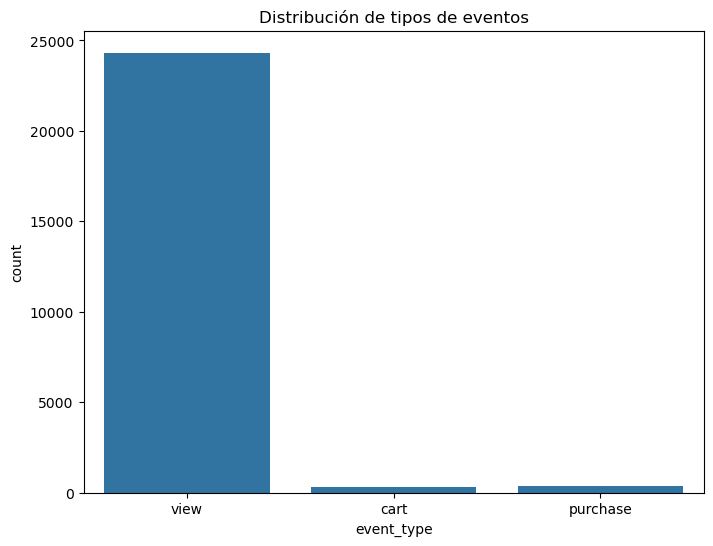

In [6]:
# 2. Distribución de los tipos de eventos
plt.figure(figsize=(8,6))
sns.countplot(x='event_type', data=df)
plt.title('Distribución de tipos de eventos')
plt.show()

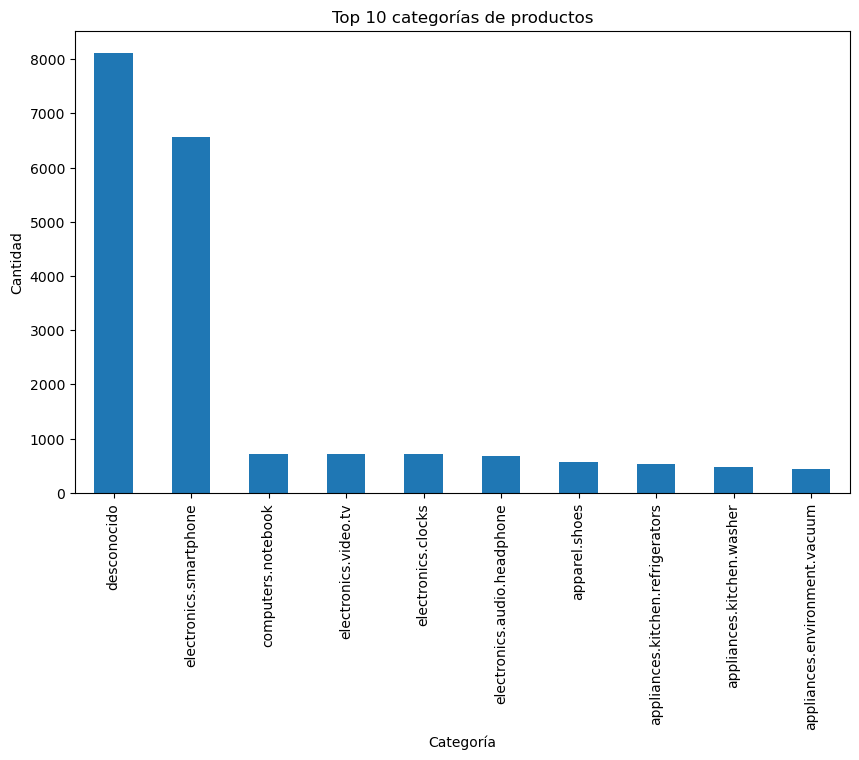

In [7]:
# 3. Distribución de las categorías de productos
plt.figure(figsize=(10,6))
df['category_code'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 categorías de productos')
plt.ylabel('Cantidad')
plt.xlabel('Categoría')
plt.show()

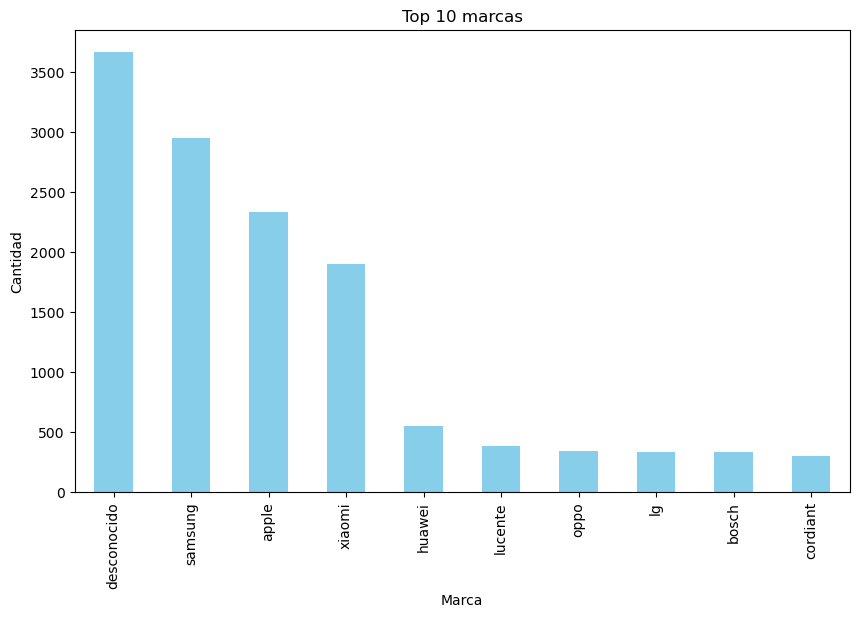

In [8]:
# 4. Distribución de marcas (top 10)
plt.figure(figsize=(10,6))
df['brand'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 marcas')
plt.ylabel('Cantidad')
plt.xlabel('Marca')
plt.show()


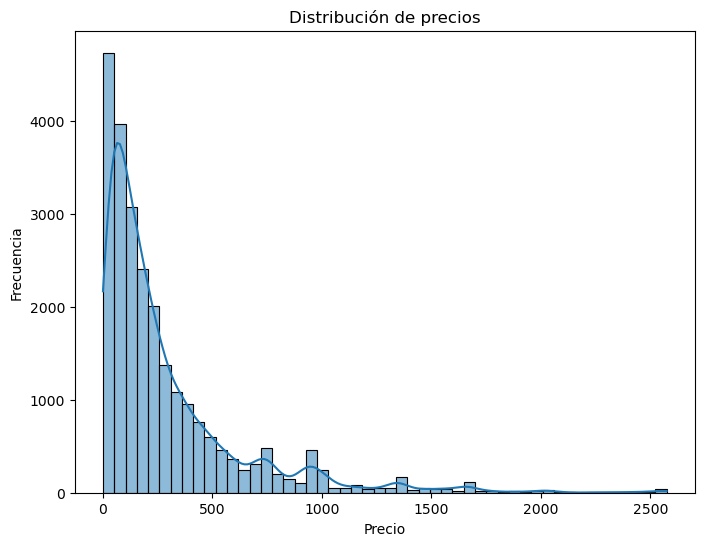

In [9]:
# 5. Distribución de los precios
plt.figure(figsize=(8,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


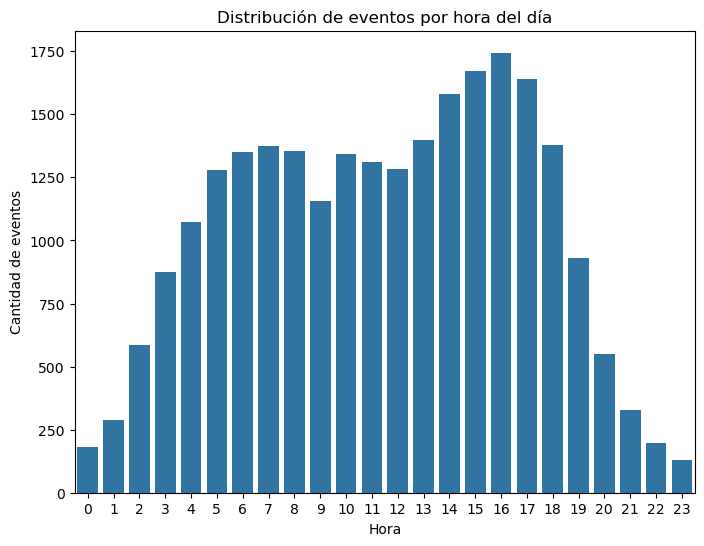

In [10]:
# 6. Análisis de eventos a lo largo del día (columna 'hour')
plt.figure(figsize=(8,6))
sns.countplot(x='hour', data=df)
plt.title('Distribución de eventos por hora del día')
plt.xlabel('Hora')
plt.ylabel('Cantidad de eventos')
plt.show()

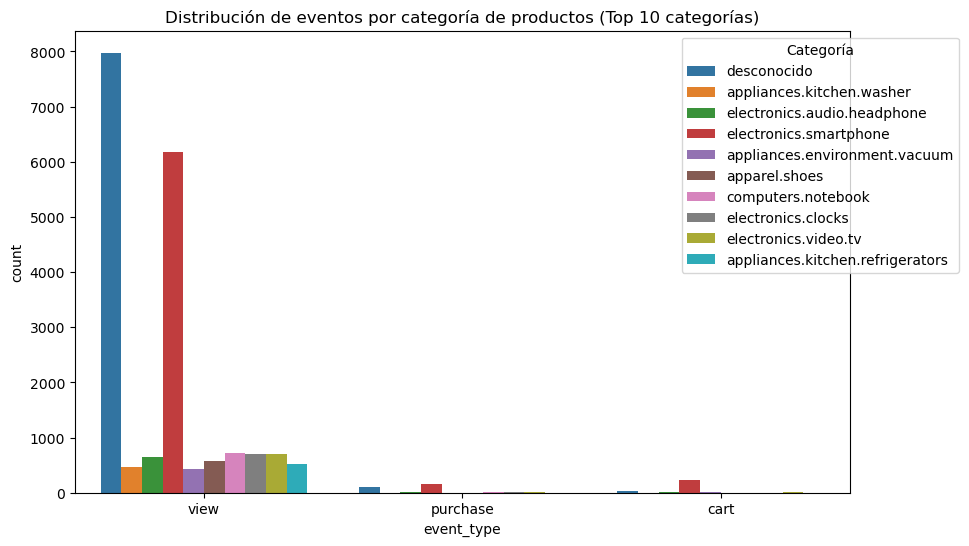

In [11]:
# 7. Eventos por categoría de producto
# Obtener las 10 categorías más frecuentes
top_10_categorias = df['category_code'].value_counts().index[:10]

# Filtrar el DataFrame para incluir solo las top 10 categorías
df_top_10_categorias = df[df['category_code'].isin(top_10_categorias)]

# Crear el gráfico de barras con las top 10 categorías
plt.figure(figsize=(10,6))
sns.countplot(x='event_type', hue='category_code', data=df_top_10_categorias, order=df['event_type'].value_counts().index)
plt.title('Distribución de eventos por categoría de productos (Top 10 categorías)')
plt.legend(title='Categoría', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


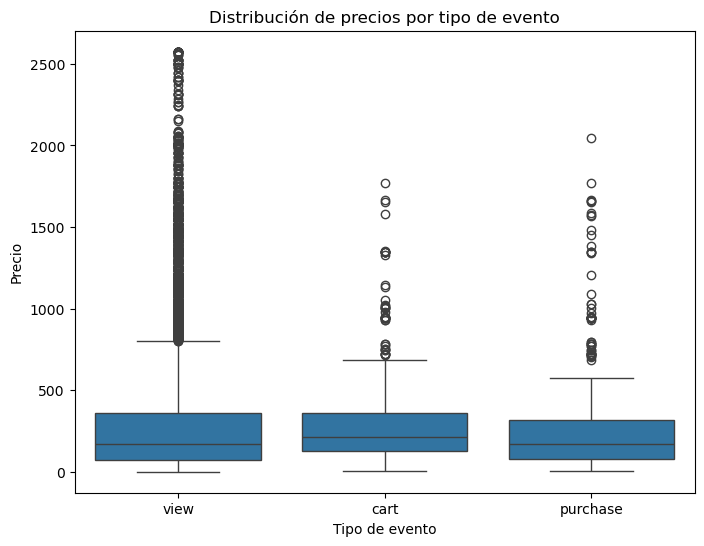

In [12]:
# 8. Relación entre precio y eventos
plt.figure(figsize=(8,6))
sns.boxplot(x='event_type', y='price', data=df)
plt.title('Distribución de precios por tipo de evento')
plt.xlabel('Tipo de evento')
plt.ylabel('Precio')
plt.show()

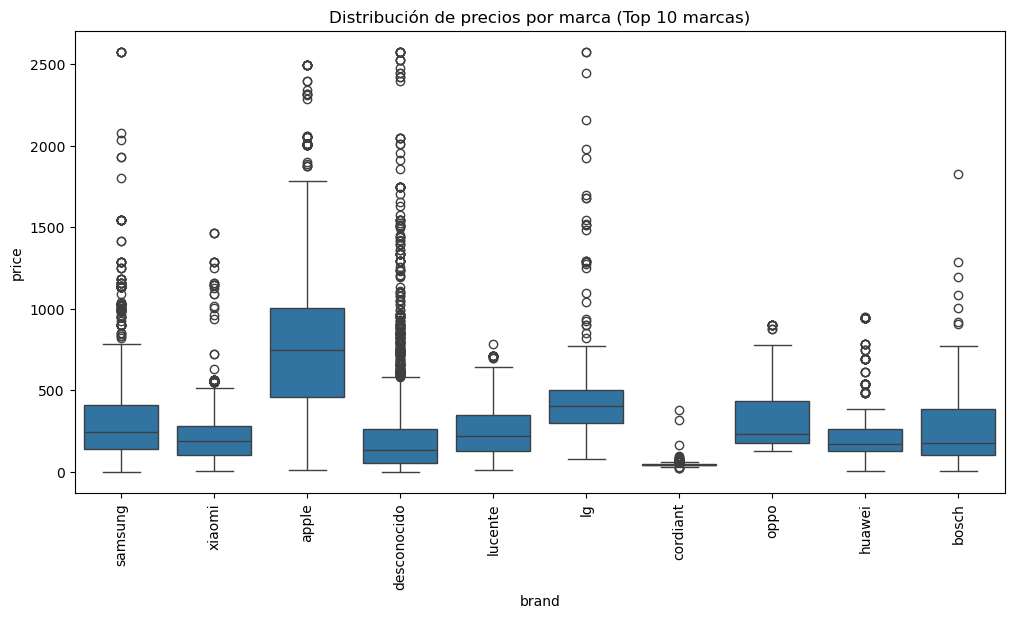

In [13]:
# 9. Relación entre precios y marcas
# Obtener las 10 marcas más frecuentes
top_10_marcas = df['brand'].value_counts().index[:10]

# Filtrar el DataFrame para incluir solo las top 10 marcas
df_top_10_marcas = df[df['brand'].isin(top_10_marcas)]

# Crear el gráfico de caja con las top 10 marcas
plt.figure(figsize=(12,6))
sns.boxplot(x='brand', y='price', data=df_top_10_marcas)
plt.title('Distribución de precios por marca (Top 10 marcas)')
plt.xticks(rotation=90)
plt.show()

## Modelo PCA

In [59]:
num = df.iloc[:,[2,3,6]]
num

,product_id,category_id,price
0,2500962,2053013564003713919,463.20
1,9600155,2053013561185141473,468.19
2,14700670,2053013557133443581,123.53
3,3600145,2053013563810775923,169.63
4,18000258,2053013558525952589,6.41
...,...,...,...
24995,1003852,2053013555631882655,229.07
24996,5301045,2053013563173241677,9.24
24997,4804055,2053013554658804075,188.94
24998,13400422,2053013557066334713,99.87


In [60]:
kmo,kmo_modelo = calculate_kmo(num)
kmo_modelo

0.5019640112336762

Dado que el índice es igual a 0.5, la adecuación muestral para un análisis factorial es aceptable.

## Analisis de componentes principales

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pca_pipe = make_pipeline(StandardScaler(),PCA()) #Se escalan los datos y luego se le aplica PCA
pca_pipe.fit(num)
#Se extrae el modelo del pipeline
modelo_pca = pca_pipe.named_steps['pca']

n_components = modelo_pca.components_.shape[0]

index_names = [f'PC{i+1}' for i in range(n_components)]

#Se convierte el arreglo en data frame
pd.DataFrame(
    data = modelo_pca.components_,
    columns = num.columns,
    index = index_names
)

,product_id,category_id,price
PC1,0.685591,0.620171,-0.381252
PC2,0.077178,0.458837,0.885162
PC3,0.723884,-0.636284,0.266711


In [62]:
print(modelo_pca.explained_variance_ratio_)

[0.53525046 0.31229684 0.1524527 ]


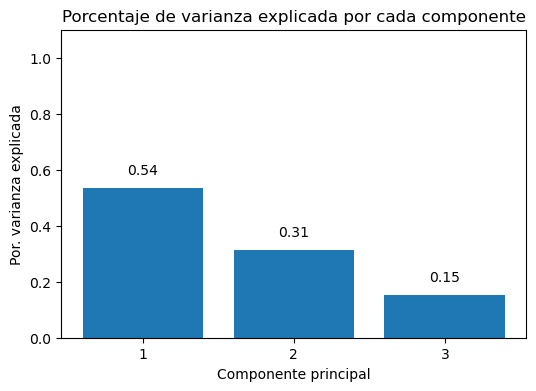

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(num.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.53525046 0.8475473  1.        ]


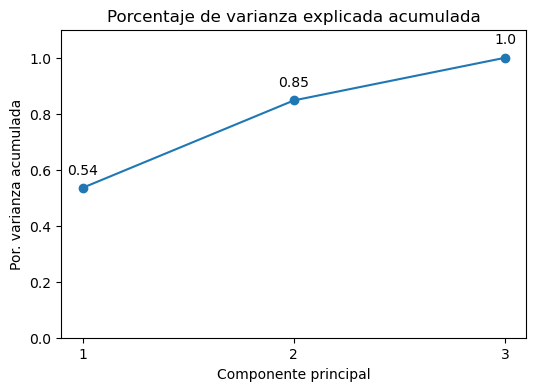

In [64]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(num.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(num.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');